linear regression

In [42]:
!pip install scikit-learn

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score




In [44]:
df=pd.read_csv("Housing (1).csv")

In [45]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [46]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

split data

In [47]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]#INDEPENDENT
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [48]:
y=df['price']
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


split into 80% 20%

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)#X is independent, y is target

In [50]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
245,5360,3,1,2,yes,no,no,no,no,2,yes,unfurnished
509,3600,2,2,2,yes,no,yes,no,no,1,no,furnished
420,4120,2,1,2,yes,no,no,no,no,0,no,unfurnished
65,8880,3,2,2,yes,no,yes,no,yes,1,no,furnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
113,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
361,6020,3,1,1,yes,no,no,no,no,0,no,semi-furnished
278,3400,3,1,2,yes,no,yes,no,no,2,yes,semi-furnished
309,4632,4,1,2,yes,no,no,no,yes,0,no,semi-furnished


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)#won't find patterns without shuffle
X_train


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
503,4000,3,1,1,yes,no,no,no,no,0,no,semi-furnished
142,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
337,2145,4,2,1,yes,no,yes,no,no,0,yes,unfurnished
357,6930,4,1,2,no,no,no,no,no,1,no,furnished
454,4500,3,1,2,yes,no,no,no,yes,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
309,4632,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
345,2015,3,1,2,yes,no,yes,no,no,0,yes,semi-furnished
234,3880,3,2,2,yes,no,yes,no,no,2,no,semi-furnished
196,7686,3,1,1,yes,yes,yes,yes,no,0,no,semi-furnished


In [52]:
y_test

,price
300,4200000
517,2450000
259,4473000
172,5250000
173,5250000
...,...
166,5320000
245,4550000
466,3010000
107,6125000


In [53]:
X_train.shape,X_test.shape

((436, 12), (109, 12))

In [54]:
y_train.shape,y_test.shape

((436,), (109,))

model training with linear equation

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
X_train.shape[0] == y_train.shape[0]

True

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Create a column transformer to apply one-hot encoding to categorical features
# 'passthrough' keeps the remaining numerical columns as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformations to the training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


model=LinearRegression()
model.fit(X_train_encoded,y_train)

LinearRegression()

In [58]:
model.coef_

array([-2.16480409e+05,  2.16480409e+05, -1.66756808e+05,  1.66756808e+05,
       -2.20014220e+05,  2.20014220e+05, -4.34980009e+05,  4.34980009e+05,
       -4.28599660e+05,  4.28599660e+05, -3.07396133e+05,  3.07396133e+05,
        1.03302213e+05,  1.17952094e+05, -2.21254307e+05,  2.34776294e+02,
        5.18751856e+04,  9.85165861e+05,  4.48899883e+05,  2.95895729e+05])

y=mx+c
y=m1x1+m2x2+....m12x12+c

In [59]:
# Get feature names after one-hot encoding
encoded_feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame of coefficients with the correct feature names as index
pd.DataFrame(model.coef_, index=encoded_feature_names, columns=['coefficients'])

,coefficients
onehot__mainroad_no,-216480.409269
onehot__mainroad_yes,216480.409269
onehot__guestroom_no,-166756.808435
onehot__guestroom_yes,166756.808435
onehot__basement_no,-220014.220263
onehot__basement_yes,220014.220263
onehot__hotwaterheating_no,-434980.008728
onehot__hotwaterheating_yes,434980.008728
onehot__airconditioning_no,-428599.660010
onehot__airconditioning_yes,428599.660010


model prediction

In [60]:
y_pred_train=model.predict(X_train_encoded)
y_pred_test=model.predict(X_test_encoded)

In [61]:
model.predict(X_train_encoded)

array([ 3153331.19186173,  6461213.76304288,  4470476.51874051,
        4190285.83157568,  4237612.1411649 ,  3620635.44253654,
        3343082.31246207,  5875254.18358042,  2762249.6055447 ,
        5047041.9662134 ,  6599112.69416411,  5097016.69157165,
        3041362.52027451,  3794972.03687928,  3352317.26442071,
        3416782.13550779,  4369705.19138846,  3468276.82041698,
        5618859.9686341 ,  3218844.15330849,  5730436.89153149,
        2723039.19746997,  2668339.0878768 ,  4503101.87109134,
        6359252.69242501,  6375126.112161  ,  6598415.93426385,
        3696009.82576164,  5775264.18739869,  7009145.83632839,
        4923397.64755669,  3162698.38425574,  3887951.56266011,
        3300822.57951151,  8797704.40876839,  4759736.42760571,
        5560209.25055332,  4529120.27569648,  5848247.83201156,
        6366167.08500549,  3007545.48855571,  4869293.33166863,
        4515776.70535967,  2400511.30949223,  5890190.61323467,
        5021542.50825354,  3907517.85573

In [62]:
X_train[:3]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
503,4000,3,1,1,yes,no,no,no,no,0,no,semi-furnished
142,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
337,2145,4,2,1,yes,no,yes,no,no,0,yes,unfurnished


In [63]:
y_train[:3]

,price
503,2660000
142,5600000
337,3920000


In [64]:
y_pred_train[:3]

array([3153331.19186173, 6461213.76304288, 4470476.51874051])

In [65]:
X_test[:3]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
300,4079,3,1,3,yes,no,no,no,no,0,no,semi-furnished
517,3000,2,1,1,yes,no,no,no,no,1,no,unfurnished
259,6360,2,1,1,yes,no,yes,no,yes,1,no,furnished


In [66]:
y_test[:3]

,price
300,4200000
517,2450000
259,4473000


In [67]:
y_pred_test[:3]

array([4069678.2848563 , 2823369.04060464, 5234001.66882973])

model evaluation

for training data

In [68]:
mean_squared_error(y_train,y_pred_train)#large value because squared


1060722806936.8618

In [69]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

np.float64(1029913.9803580014)

In [70]:
mean_absolute_error(y_train,y_pred_train)


758564.5143897178

In [71]:
r2_score(y_train,y_pred_train)

0.6813504470723089

for training data

In [72]:
def training_evaluation(actual,predicted):
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)
    print(f"MSE:{mse}")
    print(f"RMSE:{rmse}")
    print(f"MAE:{mae}")
    print(f"R2:{r2}")


In [73]:
training_evaluation(y_train,y_pred_train)

MSE:1060722806936.8618
RMSE:1029913.9803580014
MAE:758564.5143897178
R2:0.6813504470723089


for test data

In [74]:
def test_evaluation(actual,predicted):
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)
    print(f"MSE:{mse}")
    print(f"RMSE:{rmse}")
    print(f"MAE:{mae}")
    print(f"R2:{r2}")


In [75]:
test_evaluation(y_test,y_pred_test)

MSE:1343528834842.1519
RMSE:1159106.9126021774
MAE:843977.7771157641
R2:0.6709711076171847


[]

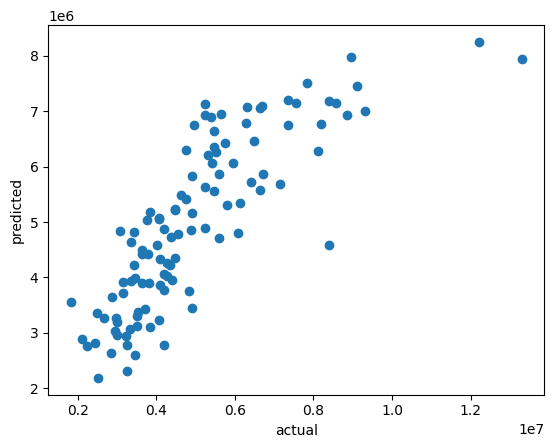

In [76]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot()

In [77]:
y_train.min()

1750000

In [78]:
y_train.max()

12250000

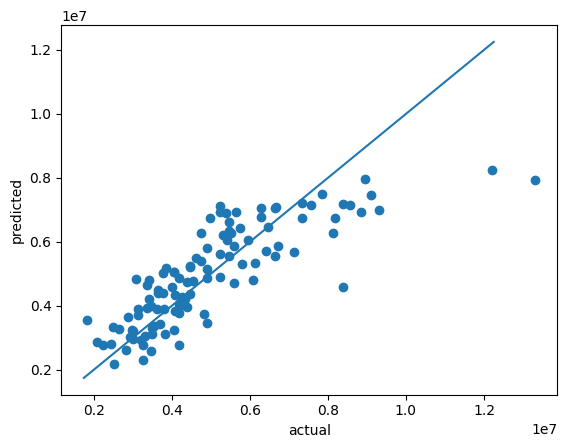

In [79]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()])